In [4]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import splitfolders
import os
import numpy as np
from modelfunc import save_model

In [ ]:
np.random.seed(123)

In [2]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.get_logger().setLevel('ERROR')

In [3]:
datapath='../0. Project Data/Original Data'
org_data_dir = pathlib.Path(datapath).with_suffix('')
org_data_dir

WindowsPath('../0. Project Data/Original Data')

In [4]:
train_split_test_dir='../0. Project Data/Original Split Data'
splitfolders.ratio(org_data_dir, output=train_split_test_dir, seed=123, ratio=(.64, .16, .2)) # ratio of split are in order of train/val/test.

#### Image Parameters

In [5]:
batch_size = 32
img_height = 180
img_width = 180
img_channels = 3

In [6]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


In [7]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [8]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [10]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=['accuracy']) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

In [11]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
84/84 [==============================] - 187s 2s/step - loss: 1.3429 - accuracy: 0.3230 - val_loss: 1.3177 - val_accuracy: 0.3628
Epoch 2/100
84/84 [==============================] - 59s 689ms/step - loss: 1.2958 - accuracy: 0.4249 - val_loss: 1.2519 - val_accuracy: 0.4723
Epoch 3/100
84/84 [==============================] - 59s 705ms/step - loss: 1.2189 - accuracy: 0.4839 - val_loss: 1.1689 - val_accuracy: 0.5022
Epoch 4/100
84/84 [==============================] - 75s 888ms/step - loss: 1.1137 - accuracy: 0.5370 - val_loss: 0.9907 - val_accuracy: 0.5937
Epoch 5/100
84/84 [==============================] - 103s 1s/step - loss: 1.0303 - accuracy: 0.5900 - val_loss: 1.2130 - val_accuracy: 0.5022
Epoch 6/100
84/84 [==============================] - 66s 784ms/step - loss: 0.9527 - accuracy: 0.6314 - val_loss: 0.7584 - val_accuracy: 0.7256
Epoch 7/100
84/84 [==============================] - 66s 778ms/step - loss: 0.8517 - accuracy: 0.6576 - val_loss: 1.3618 - val_accuracy: 0.5

84/84 [==============================] - 82s 974ms/step - loss: 0.2747 - accuracy: 0.8925 - val_loss: 0.2743 - val_accuracy: 0.8861
Epoch 42/100
84/84 [==============================] - 84s 998ms/step - loss: 0.3632 - accuracy: 0.8689 - val_loss: 0.2970 - val_accuracy: 0.8591
Epoch 43/100
84/84 [==============================] - 83s 989ms/step - loss: 0.2722 - accuracy: 0.8898 - val_loss: 0.2762 - val_accuracy: 0.8801
Epoch 44/100
84/84 [==============================] - 79s 928ms/step - loss: 0.2695 - accuracy: 0.8943 - val_loss: 0.3152 - val_accuracy: 0.8591
Epoch 45/100
84/84 [==============================] - 76s 904ms/step - loss: 0.2606 - accuracy: 0.8966 - val_loss: 0.2916 - val_accuracy: 0.8711
Epoch 46/100
84/84 [==============================] - 79s 940ms/step - loss: 0.2611 - accuracy: 0.8973 - val_loss: 0.2795 - val_accuracy: 0.8786
Epoch 47/100
84/84 [==============================] - 83s 998ms/step - loss: 0.2501 - accuracy: 0.8969 - val_loss: 0.2625 - val_accuracy: 0.881

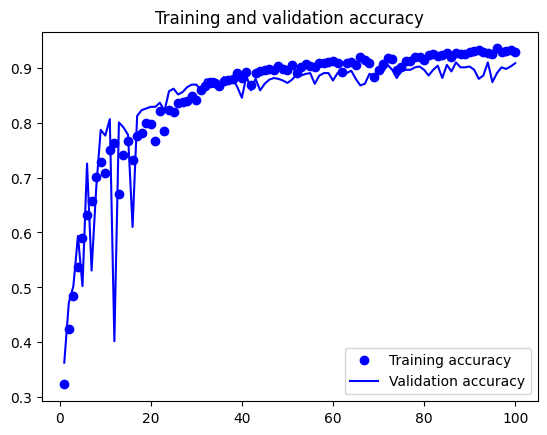

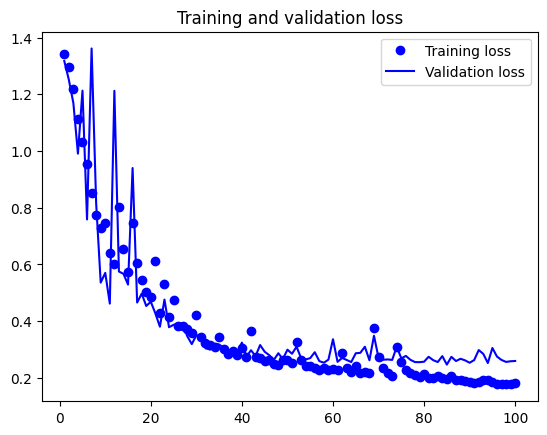

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
save_path = '../3. Model Selection/saved_models/Original Data Model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_model(model, save_path)